# 데이터 불러오기

In [10]:
#드라이브에 접근할 수 있도록 아래 코드 입력
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
#불러올 파일의 경로를 변수에 저장
train_file = '/content/drive/MyDrive/train_set.xlsx'
test_file = '/content/drive/MyDrive/test_set.xlsx'
label_file = '/content/drive/MyDrive/label_info.txt'


In [21]:
#pandas read_excel로 불러오기
import pandas as pd

train = pd.read_excel(train_file)
test = pd.read_excel(test_file)

In [19]:
#label 정보가 담긴 파일 읽기
with open(label_file, 'r') as f:
    train_label = f.readlines()
train_label = [label.strip() for label in train_label]

In [26]:
train_label

['0 : 기상변화',
 '1 : 기후변화',
 '2 : 대기',
 '3 : 물재난',
 '4 : 상수도',
 '5 : 생태계',
 '6 : 지질',
 '7 : 지하수',
 '8 : 지형',
 '9 : 토양',
 '10 : 폐기물',
 '11 : 하수도',
 '12 : 하천',
 '13 : 호소',
 '14 : 화학물질',
 '15 : 분류외 환경데이터',
 '16 : 환경데이터아님']

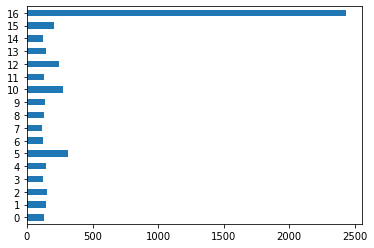

In [24]:
train['label'].value_counts().sort_index().plot(kind='barh')

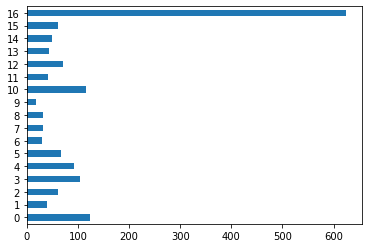

In [25]:
test['label'].value_counts().sort_index().plot(kind='barh')

# 토큰화

In [27]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
from nltk.tokenize import word_tokenize, sent_tokenize

- word_tokenize: 단어기준 토큰화
- sent_tokenize: 문장기준 토큰화

In [63]:
word_tokenize(train['text'].loc[1])

['[',
 '[',
 '오늘',
 '날씨',
 ']',
 "'경칩",
 "'",
 '영하권',
 '꽃샘추위…',
 '일부',
 '지역서',
 '눈발',
 ']',
 '체감온도가',
 '-12도까지',
 '떨어진',
 '18일',
 '오전',
 '서울',
 '종로구',
 '광화문',
 '네거리에서',
 '두꺼운',
 '외투를',
 '입은',
 '시민들이',
 '발걸음을',
 '재촉하고',
 '있다',
 '개구리가',
 '겨울잠에서',
 '깨어난다는',
 '경칩',
 '이자',
 '목요일인',
 '5일은',
 '반짝',
 '꽃샘추위가',
 '찾아오겠다',
 '.',
 '기상청에',
 '따르면',
 '이날',
 '북서쪽에서',
 '찬',
 '공기가',
 '남하하면서',
 '아침',
 '최저기온이',
 '대부분',
 '지역에서',
 '영하로',
 '내려가',
 '춥고',
 '낮',
 '기온은',
 '일사에',
 '의해',
 '오르며',
 '일교차가',
 '크겠다',
 '.',
 '아침',
 '기온은',
 '－6∼2도',
 '낮',
 '기온은',
 '6∼12도로',
 '평년보다',
 '낮겠다',
 '.',
 '특히',
 '바람까지',
 '불면서',
 '아침',
 '체감온도는',
 '－11∼－2도로',
 '더',
 '낮겠다',
 '.',
 '다만',
 '낮이',
 '되면',
 '햇볕',
 '때문에',
 '기온이',
 '5∼12도까지',
 '오르겠다',
 '.',
 '기압골의',
 '영향으로',
 '중부지방은',
 '밤까지',
 '눈이',
 '내리고',
 '일부',
 '남부지방에도',
 '곳에',
 '따라',
 '눈이',
 '날리는',
 '곳이',
 '있겠다',
 '.',
 '예상',
 '적설량은',
 '강원',
 '산지에',
 '1∼5㎝',
 '강원',
 '영서',
 '충남',
 '서해안',
 '전라',
 '서해안',
 '전북',
 '동부',
 '내륙',
 '등에',
 '1㎝',
 '내외다',
 '.',
 '미세먼지',
 '농도는',
 '전',
 '권역에서',
 '보통

In [64]:
sample = sent_tokenize(train['text'].loc[1])

In [65]:
sample

["[[오늘 날씨] '경칩' 영하권 꽃샘추위… 일부 지역서 눈발]체감온도가 -12도까지 떨어진 18일 오전 서울 종로구 광화문 네거리에서 두꺼운 외투를 입은 시민들이 발걸음을 재촉하고 있다    개구리가 겨울잠에서 깨어난다는  경칩 이자 목요일인 5일은 반짝 꽃샘추위가 찾아오겠다.",
 '기상청에 따르면 이날 북서쪽에서 찬 공기가 남하하면서 아침 최저기온이 대부분 지역에서 영하로 내려가 춥고  낮 기온은 일사에 의해 오르며 일교차가 크겠다.',
 '아침 기온은 －6∼2도  낮 기온은 6∼12도로 평년보다 낮겠다.',
 '특히 바람까지 불면서 아침 체감온도는 －11∼－2도로 더 낮겠다.',
 '다만 낮이 되면 햇볕 때문에 기온이 5∼12도까지 오르겠다.',
 '기압골의 영향으로 중부지방은 밤까지 눈이 내리고 일부 남부지방에도 곳에 따라 눈이 날리는 곳이 있겠다.',
 '예상 적설량은 강원 산지에 1∼5㎝  강원 영서  충남 서해안  전라 서해안  전북 동부 내륙 등에 1㎝ 내외다.',
 '미세먼지 농도는 전 권역에서  보통  수준으로 예상된다.',
 '다만 전날 유입된 국외 미세먼지 영향으로 강원권과 대구·경북은 오전에 일시적으로  나쁨  수준을 보이겠다고 국립환경과학원은 내다봤다.']

# 빈도수 확인

In [35]:
pd.Series(tokenized_words).value_counts().head(20)

.           9
기온은         3
아침          3
영향으로        2
다만          2
[           2
미세먼지        2
서해안         2
강원          2
낮           2
낮겠다         2
일부          2
눈이          2
]           2
두꺼운         1
－11∼－2도로    1
중부지방은       1
기압골의        1
오르며         1
오전에         1
dtype: int64

# 인코딩

In [36]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [37]:
# 단어들의 출현 빈도 벡터화
vec = CountVectorizer(tokenizer=word_tokenize, ngram_range=(1, 1))
X_cnt = vec.fit_transform(sample)

In [38]:
X_cnt

<9x123 sparse matrix of type '<class 'numpy.int64'>'
	with 140 stored elements in Compressed Sparse Row format>

In [39]:
vec.get_feature_names()

["'",
 "'경칩",
 '-12도까지',
 '.',
 '18일',
 '1∼5㎝',
 '1㎝',
 '5∼12도까지',
 '5일은',
 '6∼12도로',
 '[',
 ']',
 '강원',
 '강원권과',
 '개구리가',
 '겨울잠에서',
 '경칩',
 '곳에',
 '곳이',
 '공기가',
 '광화문',
 '국립환경과학원은',
 '국외',
 '권역에서',
 '기상청에',
 '기압골의',
 '기온은',
 '기온이',
 '깨어난다는',
 '꽃샘추위…',
 '꽃샘추위가',
 '나쁨',
 '날리는',
 '날씨',
 '남부지방에도',
 '남하하면서',
 '낮',
 '낮겠다',
 '낮이',
 '내다봤다',
 '내려가',
 '내륙',
 '내리고',
 '내외다',
 '네거리에서',
 '농도는',
 '눈발',
 '눈이',
 '다만',
 '대구·경북은',
 '대부분',
 '더',
 '동부',
 '되면',
 '두꺼운',
 '등에',
 '따라',
 '따르면',
 '때문에',
 '떨어진',
 '목요일인',
 '미세먼지',
 '바람까지',
 '반짝',
 '발걸음을',
 '밤까지',
 '보이겠다고',
 '보통',
 '북서쪽에서',
 '불면서',
 '산지에',
 '서울',
 '서해안',
 '수준으로',
 '수준을',
 '시민들이',
 '아침',
 '영서',
 '영하권',
 '영하로',
 '영향으로',
 '예상',
 '예상된다',
 '오늘',
 '오르겠다',
 '오르며',
 '오전',
 '오전에',
 '외투를',
 '유입된',
 '의해',
 '이날',
 '이자',
 '일교차가',
 '일부',
 '일사에',
 '일시적으로',
 '입은',
 '있겠다',
 '있다',
 '재촉하고',
 '적설량은',
 '전',
 '전날',
 '전라',
 '전북',
 '종로구',
 '중부지방은',
 '지역서',
 '지역에서',
 '찬',
 '찾아오겠다',
 '체감온도가',
 '체감온도는',
 '최저기온이',
 '춥고',
 '충남',
 '크겠다',
 '특히',
 '평년보다',
 '햇볕',
 '－11∼－2도로',
 '－

In [40]:
X_cnt.toarray()

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [66]:
#특징 추출
vec = TfidfVectorizer(tokenizer=word_tokenize, ngram_range=(1, 1))
X_cnt = vec.fit_transform(sample)

In [67]:
X_cnt

<9x123 sparse matrix of type '<class 'numpy.float64'>'
	with 140 stored elements in Compressed Sparse Row format>

In [68]:
X_cnt.toarray()

array([[0.15274701, 0.15274701, 0.15274701, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.35429786],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

전체 데이터에 대한 feature set 구축하기

In [69]:
vec = TfidfVectorizer(tokenizer=word_tokenize, ngram_range=(1, 1), min_df=250)
X_cnt = vec.fit_transform(train['text'])

In [70]:
X_tst = vec.transform(test['text'])

In [71]:
X_cnt

<5072x411 sparse matrix of type '<class 'numpy.float64'>'
	with 261598 stored elements in Compressed Sparse Row format>

In [72]:
X_tst

<1602x411 sparse matrix of type '<class 'numpy.float64'>'
	with 74995 stored elements in Compressed Sparse Row format>

# 모델 학습

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [74]:
clf = DecisionTreeClassifier(min_samples_split=50)
y = train['label']
clf.fit(X_cnt, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [75]:
y_pred = clf.predict(X_tst)

K-Fold 교차검증

- 학습 데이터를 K 분할하여 일부만 사용해 모델 학습 후 사용하지 않은 데이터로 모델 검증하는 방법
- 최종 test 데이터를 한번 만 사용해서 검증해볼 수 있으므로, 최적의 하이퍼파라미터를 찾는 과정에서 test 데이터에 과적합 되는 것을 방지

In [52]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

n_fold = 5
seed = 42
n_class = 17

cv = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

In [53]:
y = train.label.values
y.shape

(5072,)

In [54]:
p = np.zeros((train.shape[0], n_class))
p_tst = np.zeros((test.shape[0], n_class))

for i_cv, (i_trn, i_val) in enumerate(cv.split(X_cnt, y), 1):
    clf = DecisionTreeClassifier(min_samples_split=50, random_state=42)
    clf.fit(X_cnt[i_trn], y[i_trn])
    p[i_val, :] = clf.predict_proba(X_cnt[i_val])
    print(f"Fold {i_cv} complete")

Fold 1 complete
Fold 2 complete
Fold 3 complete
Fold 4 complete
Fold 5 complete


In [55]:
p

array([[0.        , 0.02439024, 0.04878049, ..., 0.02439024, 0.        ,
        0.29268293],
       [0.63414634, 0.        , 0.19512195, ..., 0.        , 0.02439024,
        0.02439024],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [56]:
p.shape

(5072, 17)

In [57]:
train['label'].value_counts()

16    2431
5      311
10     274
12     248
15     205
2      154
1      149
4      148
13     142
9      134
11     133
0      128
8      127
3      126
6      123
14     121
7      118
Name: label, dtype: int64

In [58]:
2431 / train.shape[0] * 100

47.92981072555205

In [59]:
from sklearn.metrics import accuracy_score
print(f'Accuracy (CV): {accuracy_score(y, np.argmax(p, axis=1)) * 100}%')

Accuracy (CV): 49.48738170347003%


In [60]:
p = np.zeros((train.shape[0], n_class))
p_tst = np.zeros((test.shape[0], n_class))

for i_cv, (i_trn, i_val) in enumerate(cv.split(X_cnt, y), 1):
    clf = RandomForestClassifier(min_samples_split=50, n_jobs=-1, n_estimators=50, random_state=42)
    clf.fit(X_cnt[i_trn], y[i_trn])
    p[i_val, :] = clf.predict_proba(X_cnt[i_val])
    p_tst += clf.predict_proba(X_tst) / n_class #테스트 셋에 대해서도 예측
    print(f"Fold {i_cv} complete")

Fold 1 complete
Fold 2 complete
Fold 3 complete
Fold 4 complete
Fold 5 complete


In [61]:
print(f'Accuracy (CV): {accuracy_score(y, np.argmax(p, axis=1)) * 100}%')
print(f'Accuracy (test): {accuracy_score(test.label.values, np.argmax(p_tst, axis=1)) * 100}%')

Accuracy (CV): 55.520504731861195%
Accuracy (test): 44.694132334581774%
